In [1]:
# Created: 20250104

In [2]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [3]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


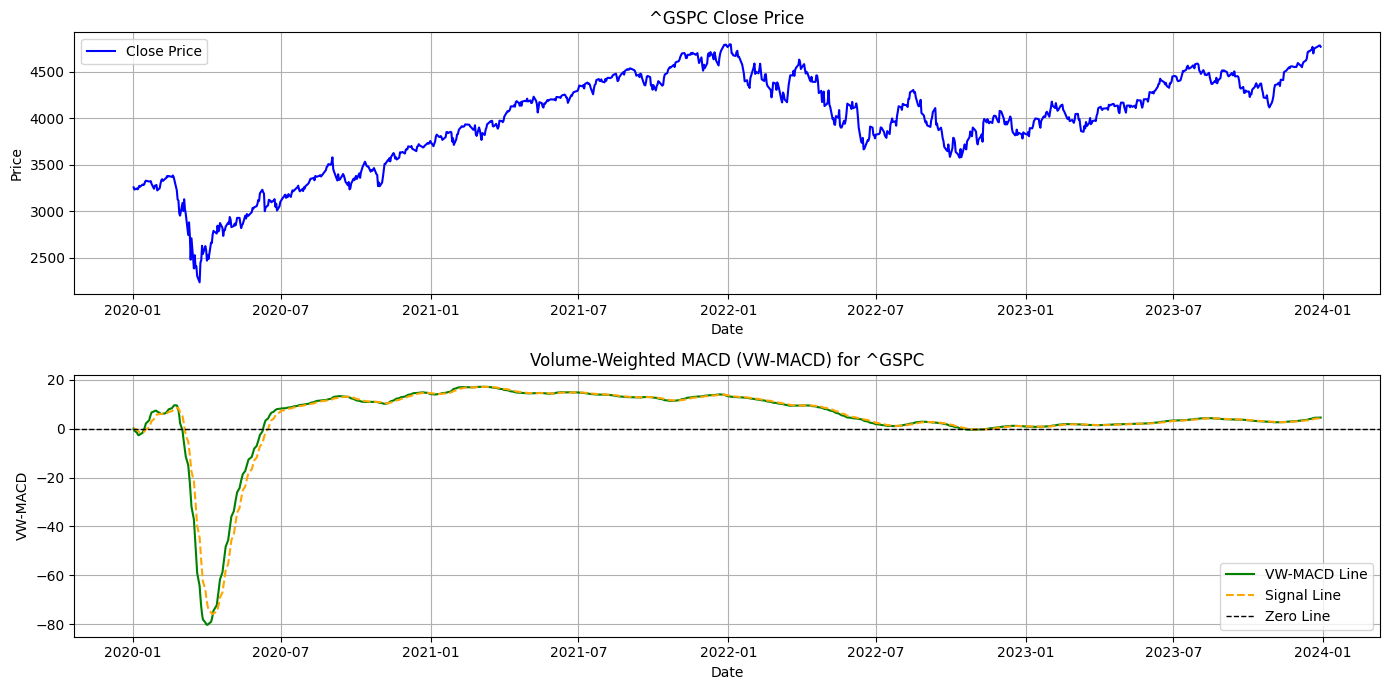

In [5]:
# Step 2: Calculate VW-MACD
def calculate_vw_macd(data, fast_period=12, slow_period=26, signal_period=9):
    # Calculate Volume-Weighted Close
    data['VW-Close'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()
    
    # Calculate Fast and Slow EMA of VW-Close
    data['Fast EMA'] = data['VW-Close'].ewm(span=fast_period, adjust=False).mean()
    data['Slow EMA'] = data['VW-Close'].ewm(span=slow_period, adjust=False).mean()
    
    # Calculate VW-MACD Line
    data['VW-MACD'] = data['Fast EMA'] - data['Slow EMA']
    
    # Calculate Signal Line
    data['Signal Line'] = data['VW-MACD'].ewm(span=signal_period, adjust=False).mean()
    
    return data

In [6]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply VW-MACD calculation
    data = calculate_vw_macd(data)
    
    # Step 3: Plot VW-MACD
    plt.figure(figsize=(14, 7))
    
    # Plot VW-MACD and Signal Line
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(data['VW-MACD'], label='VW-MACD Line', color='green', linewidth=1.5)
    plt.plot(data['Signal Line'], label='Signal Line', color='orange', linestyle='--', linewidth=1.5)
    plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')
    plt.title(f'Volume-Weighted MACD (VW-MACD) for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('VW-MACD')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


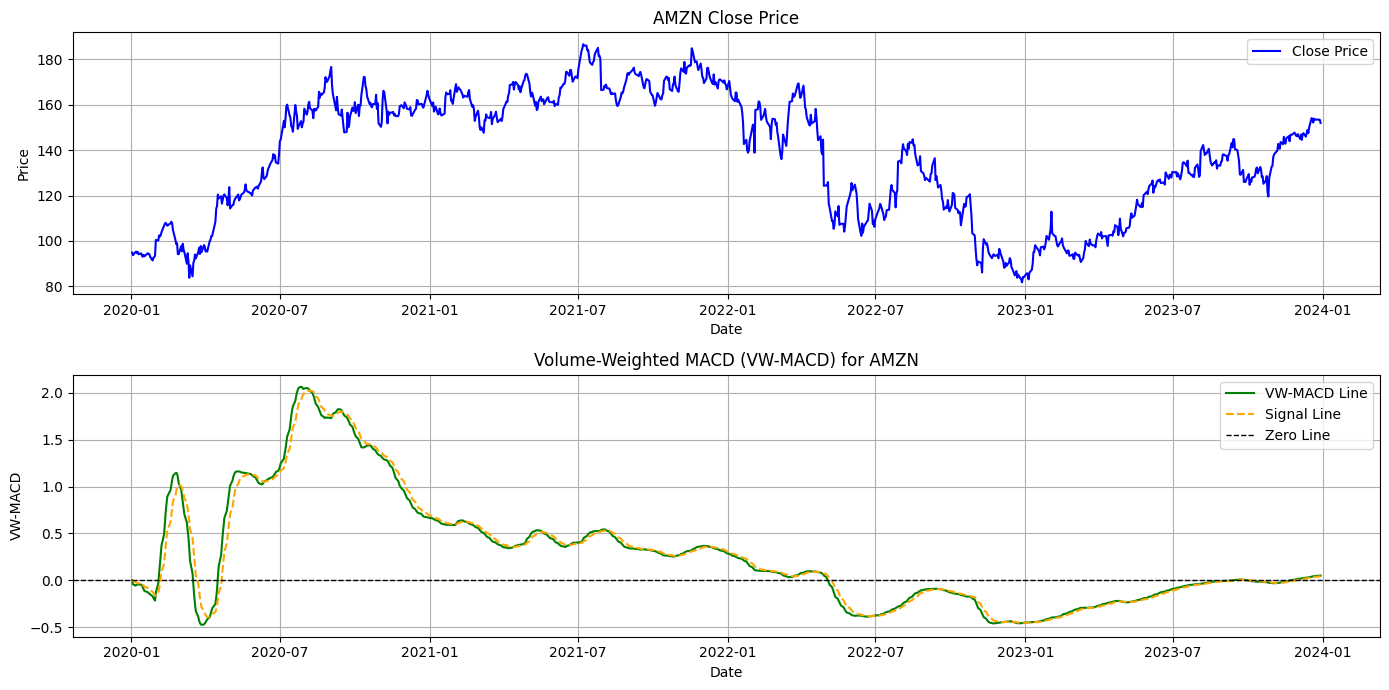

In [7]:
show_graph("AMZN")